In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

rows = 9000

data = {
    "income": np.random.normal(50000, 20000, rows),
    "debts": np.random.normal(15000, 10000, rows),
    "credit_score": np.random.randint(300, 850, rows),
    "employment_years": np.random.randint(0, 35, rows),
    "loan_amount": np.random.normal(20000, 15000, rows),
    "payment_history": np.random.randint(0, 6, rows),
    "age": np.random.randint(18, 70, rows),
    "loan_term": np.random.choice([12, 24, 36, 48, 60], rows)
}

df = pd.DataFrame(data)

# ---------- Target Variable ----------
df["creditworthy"] = np.where(
    (df["credit_score"] > 650) &
    (df["payment_history"] <= 1) &
    (df["income"] > df["loan_amount"] / 2),
    1,
    0
)

# ---------- Introduce Missing Values ----------
for col in df.columns:
    df.loc[df.sample(frac=0.08).index, col] = np.nan

# ---------- Messy Data ----------
df.loc[df.sample(frac=0.03).index, "income"] *= -1   # negative income
df.loc[df.sample(frac=0.03).index, "debts"] *= 5     # extreme debts

df.sample(2)


,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
3135,58860.042609,19340.684872,469.0,11.0,16726.394368,3.0,32.0,60.0,0.0
2758,NaN,19137.542029,379.0,17.0,26065.495292,4.0,57.0,12.0,0.0


INFO REGARDING COLUMNS


In [ ]:
# info regarding DataFrame
#  income ---> personal income of the applicant    --> Normally Distributed
#  debts ---> total existing debts of the applicant (loan)   -->Not normslly Distributed
#  credit_score  ----> means that pereson's history in returning loans ,wether he returned that on time or not --->Not normally Distributed
#  employment years ---> means for how long he has benn doing his job  --->Not normally distributed
#  Loan_amount -->   The amount of Loan a person is applying(demanding/desiring) for         -----> Normally Distributed      
# payment_history ---> This column indicates the commitmentness of a person like how responsible a person is on returning the loan on time , the value telling how many times a person has given his payment --> Not normally Distributed
#  age ---> age of the applicant  --> Not perfectly normally distributed
#  loan_term ---> duration of the loan in months  ---> Not normally Distributed
# creditworthy ---> Target variable indicating if the applicant is creditworthy like wether he is worthy to give loan to or not


EXPLORING DATASET


<Axes: ylabel='Density'>

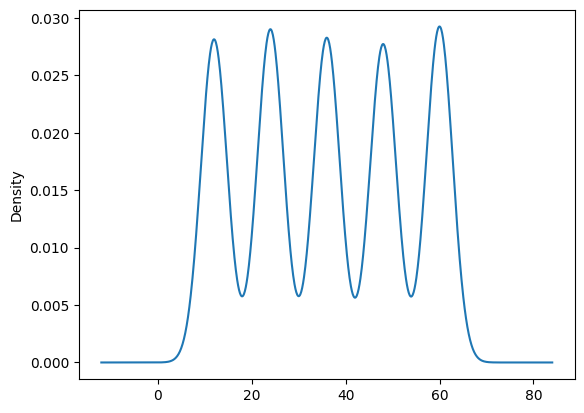

In [16]:
df['loan_term'].plot(kind='kde')

In [3]:
df.sample(2)

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
8580,53478.944168,29022.095895,361.0,23.0,32204.782041,1.0,51.0,24.0,0.0
668,-3019.396168,5750.741843,725.0,4.0,NaN,1.0,41.0,36.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income            8280 non-null   float64
 1   debts             8280 non-null   float64
 2   credit_score      8280 non-null   float64
 3   employment_years  8280 non-null   float64
 4   loan_amount       8280 non-null   float64
 5   payment_history   8280 non-null   float64
 6   age               8280 non-null   float64
 7   loan_term         8280 non-null   float64
 8   creditworthy      8280 non-null   float64
dtypes: float64(9)
memory usage: 632.9 KB


In [ ]:
(df.isnull().sum())/len(df)

,0
income,0.08
debts,0.08
credit_score,0.08
employment_years,0.08
loan_amount,0.08
payment_history,0.08
age,0.08
loan_term,0.08
creditworthy,0.08


In [23]:
df.isnull().any()

,0
income,True
debts,True
credit_score,True
employment_years,True
loan_amount,True
payment_history,True
age,True
loan_term,True
creditworthy,True


In [ ]:
df.describe()

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
count,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000
mean,46719.729536,16961.989294,574.497222,17.049396,19904.361375,2.485749,43.286594,36.079710,0.122585
std,26714.018881,17093.930888,159.982715,10.143807,15001.955147,1.711331,14.960620,17.015924,0.327980
min,-109705.180052,-73418.421512,300.000000,0.000000,-39423.693520,0.000000,18.000000,12.000000,0.000000
25%,34751.134545,8568.486931,436.000000,8.000000,10008.847689,1.000000,30.000000,24.000000,0.000000
50%,49049.179413,15403.683196,574.000000,17.000000,19909.747563,3.000000,43.000000,36.000000,0.000000
75%,62820.351144,22358.174341,712.000000,26.000000,29860.172583,4.000000,56.000000,48.000000,0.000000
max,128524.754129,243888.412064,849.000000,34.000000,81491.754994,5.000000,69.000000,60.000000,1.000000


<Axes: xlabel='creditworthy', ylabel='income'>

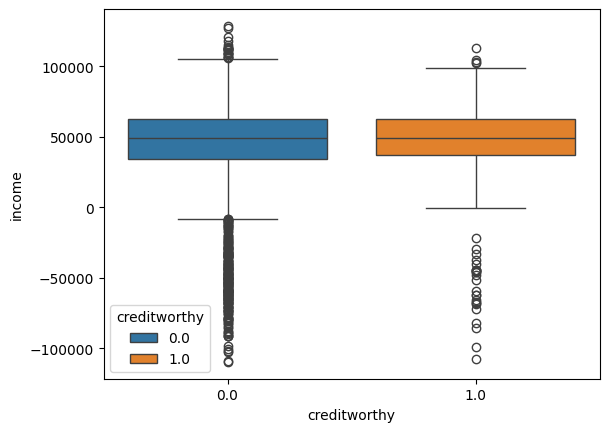

In [ ]:
sns.boxplot(x=df['creditworthy'],y=df['income'],hue=df['creditworthy'])  

<Axes: >

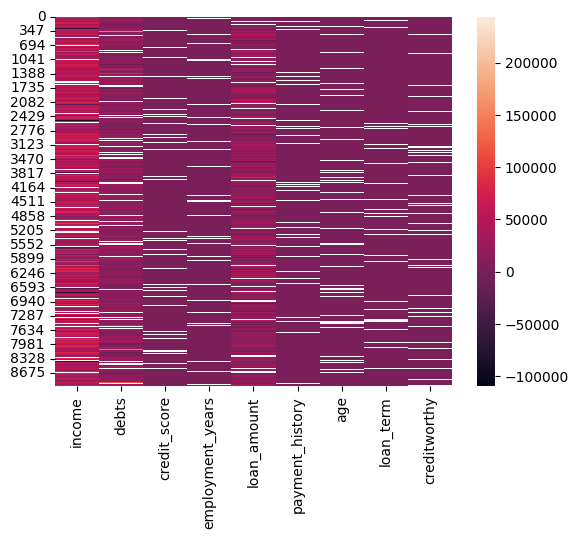

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df)

In [27]:
df.dropna().shape

(4261, 9)

In [41]:
df.head(1)

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
0,59934.28306,22654.02156,813.0,8.0,15537.525878,3.0,20.0,12.0,NaN


<Axes: xlabel='creditworthy', ylabel='debts'>

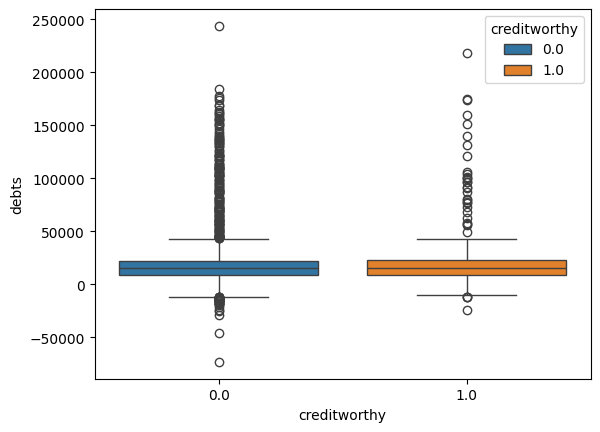

In [42]:
sns.boxplot(x=df['creditworthy'],y=df['debts'],hue=df['creditworthy'])

In [ ]:
df['income']

,count
debts,
25314.159064,1
22654.021560,1
25734.127024,1
19986.899121,1
-4424.976910,1
...,...
-10208.470066,1
2016.740603,1
18417.539207,1


INCOME_COLUMN_Exploring + PROBLEMS_writing


In [61]:
df['income'].sample( 5)

,income
8655,26515.954086
8062,19939.062813
5524,32873.029634
5430,36279.004859
1325,10490.668673


<Axes: ylabel='Density'>

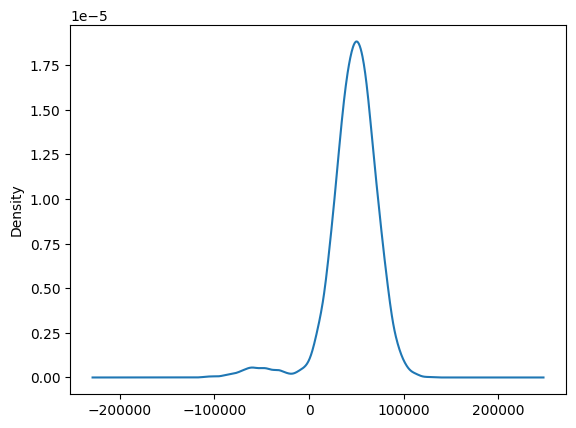

In [62]:
df['income'].plot(kind='kde')

<Axes: ylabel='income'>

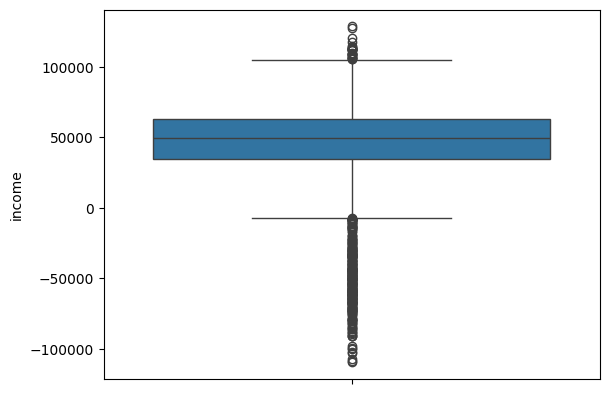

In [ ]:
sns.boxplot(df['income'])
#  will have to handle these -ive numeric income values ,thses may be of the mistyping of the data entry operators

Debth COLUMN'S EXPLORING

In [5]:
df['debts'].describe()
# min value is in -ve , so we will have to handle these -ive debt values , these may be of the mistyping of the data entry operators

,debts
count,8280.000000
mean,16961.989294
std,17093.930888
min,-73418.421512
25%,8568.486931
50%,15403.683196
75%,22358.174341
max,243888.412064


In [7]:
df['debts'].sample(5)

,debts
1595,20001.128296
2406,NaN
8119,20513.983428
3905,-2695.102364
926,6656.263877


<Axes: >

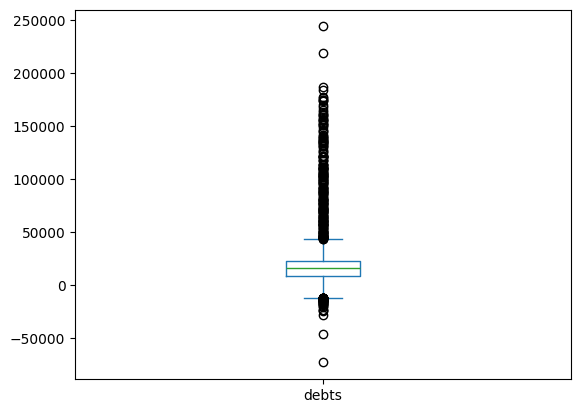

In [9]:
df['debts'].plot(kind='box')

<Axes: xlabel='creditworthy', ylabel='debts'>

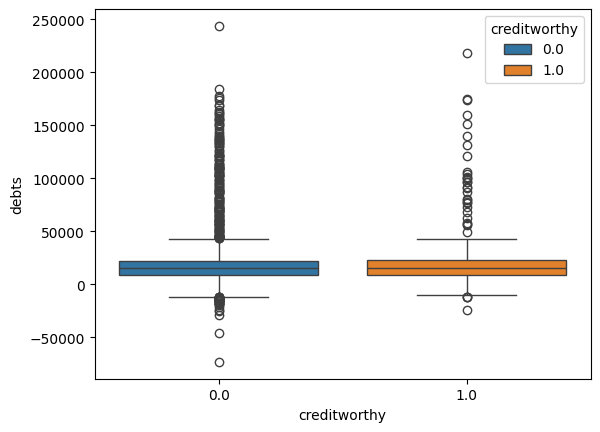

In [11]:
import seaborn as sns
sns.boxplot(x=df['creditworthy'],y=df['debts'],hue=df['creditworthy'])

In [13]:
df[df['debts'].isnull()]

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
16,29743.377593,NaN,583.0,19.0,23152.617889,2.0,68.0,60.0,0.0
26,26980.128452,NaN,623.0,14.0,-17420.662225,4.0,27.0,24.0,0.0
29,44166.125004,NaN,695.0,26.0,17921.318730,5.0,19.0,48.0,0.0
49,14739.196893,NaN,NaN,16.0,56990.730662,1.0,28.0,24.0,0.0
67,70070.657958,NaN,763.0,13.0,23290.314627,2.0,50.0,24.0,NaN
...,...,...,...,...,...,...,...,...,...
8919,66518.471661,NaN,709.0,18.0,21508.073400,3.0,31.0,12.0,0.0
8920,83666.291519,NaN,797.0,5.0,13708.593523,4.0,53.0,24.0,0.0
8932,50447.011099,NaN,834.0,12.0,-8148.785598,NaN,40.0,60.0,1.0
8939,46934.788932,NaN,762.0,5.0,-1634.794235,1.0,26.0,24.0,1.0


CREDIT_SCORE_COLUMN

In [14]:
df['credit_score'].describe()

,credit_score
count,8280.000000
mean,574.497222
std,159.982715
min,300.000000
25%,436.000000
50%,574.000000
75%,712.000000
max,849.000000


TypeError: Axes.boxplot() got an unexpected keyword argument 'hue'

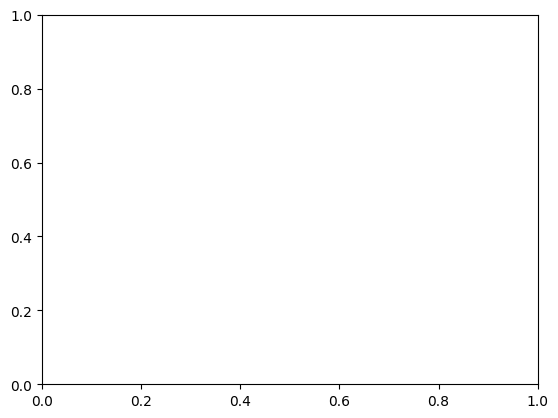

In [15]:
df['credit_score'].plot(kind='box',x=df['creditworthy'],y=df['credit_score'],hue=df['creditworthy'])

Feature scaling

We'll impute numeric columns with their medians, handle negative income by taking absolute values (simple cleaning), then create Standard-scaled and MinMax-scaled versions of numeric features. Scaled columns are appended to `df` with suffixes `_std` and `_minmax`.